In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

#-*- coding:utf-8 -*-
from matplotlib.font_manager import FontProperties #字体管理器

#设置汉字格式
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def isid(data,var):
    dup = data.duplicated(var, keep=False)
    if True in dup.values:
        print(str(var)+"not unique")
    else:
        print(str(var)+"unique")

In [3]:

os.chdir("C:/Users/sff/Desktop/fin3080 project/dataset_1.1")
rm_rf = pd.read_csv("rm_rf.csv")
rm_rf.head()

,date,sh180,dpt
0,2017/1/6,7307.0042,0.015
1,2017/1/13,7277.2236,0.015
2,2017/1/20,7390.0883,0.015
3,2017/1/26,7459.7359,0.015
4,2017/2/3,7404.0059,0.015


In [4]:
rm_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   sh180   204 non-null    float64
 2   dpt     204 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


In [5]:
rm_rf["date"] = pd.to_datetime(rm_rf.date, format="%Y-%m-%d")
rm_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   sh180   204 non-null    float64       
 2   dpt     204 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.9 KB


In [6]:
rm_rf.describe()

,sh180,dpt
count,204.000000,2.040000e+02
mean,8313.642595,1.500000e-02
std,796.879191,1.565092e-17
min,6808.796200,1.500000e-02
25%,7618.753575,1.500000e-02
50%,8306.992900,1.500000e-02
75%,8661.372125,1.500000e-02
max,10413.104900,1.500000e-02


In [7]:
print(isid(rm_rf,["date","sh180"]))
print(isid(rm_rf,["date","dpt"]))

['date', 'sh180']unique
None
['date', 'dpt']unique
None


In [8]:
rm_rf.isnull()
#no null

,date,sh180,dpt
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
199,False,False,False
200,False,False,False
201,False,False,False
202,False,False,False


In [9]:
rm_rf.head()

,date,sh180,dpt
0,2017-01-06,7307.0042,0.015
1,2017-01-13,7277.2236,0.015
2,2017-01-20,7390.0883,0.015
3,2017-01-26,7459.7359,0.015
4,2017-02-03,7404.0059,0.015


In [10]:
rm_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   sh180   204 non-null    float64       
 2   dpt     204 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.9 KB


In [11]:
ri = pd.read_csv("ri_new.csv")
ri.head()

,permno,date,prc
0,000001.SZ,2017-1-6,956.4430
1,000001.SZ,2017-1-13,959.5857
2,000001.SZ,2017-1-20,965.8712
3,000001.SZ,2017-1-26,977.3946
4,000001.SZ,2017-2-3,970.0615


In [12]:
ri["date"] =pd.to_datetime(ri.date,format="%Y-%m-%d")
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568290 entries, 0 to 568289
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   permno  568288 non-null  object        
 1   date    568288 non-null  datetime64[ns]
 2   prc     568288 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.0+ MB


In [13]:
ri.permno.value_counts()

002034.SZ    204
600987.SH    204
002753.SZ    204
600016.SH    204
600800.SH    204
            ... 
003020.SZ      2
003029.SZ      1
601956.SH      1
605186.SH      1
605500.SH      1
Name: permno, Length: 3027, dtype: int64

In [14]:
isid(ri, ["permno","date"])

['permno', 'date']not unique


In [15]:
ri = ri.drop_duplicates(subset=["permno","date"],keep="first")

In [16]:
isid(ri, ["permno","date"])

['permno', 'date']unique


In [33]:
ri = ri.set_index(["date","permno"])
ri = ri.unstack()
ri.head()

prc                                                     \
permno     000001.SZ  000002.SZ 000004.SZ 000005.SZ 000006.SZ 000007.SZ   
date                                                                      
2017-01-06  956.4430  2740.6303  178.6474   65.1512  325.8320  140.5143   
2017-01-13  959.5857  2895.9858  166.6183   61.9076  287.4222  131.4596   
2017-01-20  965.8712  2745.9416  148.2497   60.2394  277.9826  131.4596   
2017-01-26  977.3946  2745.9416  155.6053   60.7955  282.2141  131.4596   
2017-02-03  970.0615  2745.9416  156.7838   60.5174  281.2376  131.4596   

                                                    ...        ri            \
permno     000008.SZ 000009.SZ 000010.SZ 000011.SZ  ... 603986.SH 603987.SH   
date                                                ...                       
2017-01-06  208.7584   76.9170   83.0718   68.3177  ...       0.0  0.000000   
2017-01-13  202.8127   73.6969   76.0683   57.7243  ...       0.0 -0.081217   
2017-01-20  190.2608   68.9399   74.1289   56.3748  ...       0.0 -0.007639   
2017-01-26  191.8023   69.5985   76.6070   56.0374  ...       0.0  0.000733   
2017-02-03  190.2608   69.6717   75.5296   56.1724  ...       0.0 -0.008791   

                                                                        \
permno     603988.SH 603989.SH 603990.SH 603993.SH 603996.SH 603997.SH   
date                                                                     
2017-01-06  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2017-01-13  0.073278 -0.035307 -0.064115  0.039792 -0.022052 -0.072375   
2017-01-20 -0.138885 -0.034869 -0.048358  0.000000 -0.037743 -0.029120   
2017-01-26  0.004428  0.002090  0.092314  0.053568  0.003564  0.038487   
2017-02-03 -0.008818  0.000595 -0.010661 -0.016946  0.003049 -0.016352   

                                
permno     603998.SH 603999.SH  
date                            
2017-01-06  0.000000  0.000000  
2017-01-13  0.031304 -0.037158  
2017-01-20 -0.091059 -0.052255  
2017-01-26  0.042502 -0.007928  
2017-02-03 -0.003495 -0.001451  

[5 rows x 4840 columns]

In [34]:
ri = ri.stack(dropna=False)
ri.head()

prc   ri
date       permno                   
2017-01-06 000001.SZ   956.4430  0.0
           000002.SZ  2740.6303  0.0
           000004.SZ   178.6474  0.0
           000005.SZ    65.1512  0.0
           000006.SZ   325.8320  0.0

In [35]:
ri = ri.reset_index()
ri.head()

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.0
1,2017-01-06,000002.SZ,2740.6303,0.0
2,2017-01-06,000004.SZ,178.6474,0.0
3,2017-01-06,000005.SZ,65.1512,0.0
4,2017-01-06,000006.SZ,325.8320,0.0


In [36]:
ri = ri.sort_values(["permno","date"])
ri

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
2420,2017-01-13,000001.SZ,959.5857,0.003286
4840,2017-01-20,000001.SZ,965.8712,0.006550
7260,2017-01-26,000001.SZ,977.3946,0.011931
9680,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
483999,2020-11-27,603999.SH,14.6558,-0.009951
486419,2020-12-04,603999.SH,15.1222,0.031824
488839,2020-12-11,603999.SH,14.2385,-0.058437
491259,2020-12-18,603999.SH,13.9930,-0.017242


In [37]:
ri = ri.dropna(axis=0, how='any')

In [38]:
ri

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
2420,2017-01-13,000001.SZ,959.5857,0.003286
4840,2017-01-20,000001.SZ,965.8712,0.006550
7260,2017-01-26,000001.SZ,977.3946,0.011931
9680,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
483999,2020-11-27,603999.SH,14.6558,-0.009951
486419,2020-12-04,603999.SH,15.1222,0.031824
488839,2020-12-11,603999.SH,14.2385,-0.058437
491259,2020-12-18,603999.SH,13.9930,-0.017242


In [39]:
ri.permno.value_counts()

002034.SZ    204
002395.SZ    204
600096.SH    204
000909.SZ    204
002512.SZ    204
            ... 
600415.SH    204
600655.SH    204
002074.SZ    204
002200.SZ    204
600171.SH    204
Name: permno, Length: 2420, dtype: int64

In [40]:
df = ri.permno.value_counts().rename_axis('unique_values').to_frame('counts')
df

,counts
unique_values,
002034.SZ,204
002395.SZ,204
600096.SH,204
000909.SZ,204
002512.SZ,204
...,...
600415.SH,204
600655.SH,204
002074.SZ,204


In [41]:
df = df.reset_index()
df

,unique_values,counts
0,002034.SZ,204
1,002395.SZ,204
2,600096.SH,204
3,000909.SZ,204
4,002512.SZ,204
...,...,...
2415,600415.SH,204
2416,600655.SH,204
2417,002074.SZ,204
2418,002200.SZ,204


In [42]:
not_fix = []
i =0
for value in df.counts:
    if value <204:
        dele = df.iloc[i,0]
        not_fix.append(dele)
    i=i+1
print(not_fix)

[]


In [43]:
ri = ri.reset_index(drop=True)
ri.head()

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
1,2017-01-13,000001.SZ,959.5857,0.003286
2,2017-01-20,000001.SZ,965.8712,0.006550
3,2017-01-26,000001.SZ,977.3946,0.011931
4,2017-02-03,000001.SZ,970.0615,-0.007503


In [44]:
ri = ri[~ri["permno"].isin(not_fix)]
ri
#把有204天的stocks都筛选出来

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
1,2017-01-13,000001.SZ,959.5857,0.003286
2,2017-01-20,000001.SZ,965.8712,0.006550
3,2017-01-26,000001.SZ,977.3946,0.011931
4,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
493675,2020-11-27,603999.SH,14.6558,-0.009951
493676,2020-12-04,603999.SH,15.1222,0.031824
493677,2020-12-11,603999.SH,14.2385,-0.058437
493678,2020-12-18,603999.SH,13.9930,-0.017242


In [45]:
ri.permno.value_counts()

002034.SZ    204
002395.SZ    204
600096.SH    204
000909.SZ    204
002512.SZ    204
            ... 
600415.SH    204
600655.SH    204
002074.SZ    204
002200.SZ    204
600171.SH    204
Name: permno, Length: 2420, dtype: int64

In [46]:
ri

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
1,2017-01-13,000001.SZ,959.5857,0.003286
2,2017-01-20,000001.SZ,965.8712,0.006550
3,2017-01-26,000001.SZ,977.3946,0.011931
4,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
493675,2020-11-27,603999.SH,14.6558,-0.009951
493676,2020-12-04,603999.SH,15.1222,0.031824
493677,2020-12-11,603999.SH,14.2385,-0.058437
493678,2020-12-18,603999.SH,13.9930,-0.017242


In [47]:
ri["ri"] = ri.groupby("permno").prc.pct_change()
ri

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,NaN
1,2017-01-13,000001.SZ,959.5857,0.003286
2,2017-01-20,000001.SZ,965.8712,0.006550
3,2017-01-26,000001.SZ,977.3946,0.011931
4,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
493675,2020-11-27,603999.SH,14.6558,-0.009951
493676,2020-12-04,603999.SH,15.1222,0.031824
493677,2020-12-11,603999.SH,14.2385,-0.058437
493678,2020-12-18,603999.SH,13.9930,-0.017242


In [48]:
ri = ri.fillna(0)
ri

,date,permno,prc,ri
0,2017-01-06,000001.SZ,956.4430,0.000000
1,2017-01-13,000001.SZ,959.5857,0.003286
2,2017-01-20,000001.SZ,965.8712,0.006550
3,2017-01-26,000001.SZ,977.3946,0.011931
4,2017-02-03,000001.SZ,970.0615,-0.007503
...,...,...,...,...
493675,2020-11-27,603999.SH,14.6558,-0.009951
493676,2020-12-04,603999.SH,15.1222,0.031824
493677,2020-12-11,603999.SH,14.2385,-0.058437
493678,2020-12-18,603999.SH,13.9930,-0.017242


In [49]:
rm_rf

,date,sh180,dpt
0,2017-01-06,7307.0042,0.015
1,2017-01-13,7277.2236,0.015
2,2017-01-20,7390.0883,0.015
3,2017-01-26,7459.7359,0.015
4,2017-02-03,7404.0059,0.015
...,...,...,...
199,2020-11-27,10267.6132,0.015
200,2020-12-04,10413.1049,0.015
201,2020-12-11,10076.5428,0.015
202,2020-12-18,10307.5124,0.015


In [50]:
rm_rf = rm_rf.sort_values("date")
rm_rf

,date,sh180,dpt
0,2017-01-06,7307.0042,0.015
1,2017-01-13,7277.2236,0.015
2,2017-01-20,7390.0883,0.015
3,2017-01-26,7459.7359,0.015
4,2017-02-03,7404.0059,0.015
...,...,...,...
199,2020-11-27,10267.6132,0.015
200,2020-12-04,10413.1049,0.015
201,2020-12-11,10076.5428,0.015
202,2020-12-18,10307.5124,0.015


In [51]:
rm_rf["rm"] = rm_rf.sh180.pct_change()
rm_rf = rm_rf.fillna(0)
rm_rf.rename(columns={'dpt':'rf'}, inplace = True)
rm_rf

,date,sh180,rf,rm
0,2017-01-06,7307.0042,0.015,0.000000
1,2017-01-13,7277.2236,0.015,-0.004076
2,2017-01-20,7390.0883,0.015,0.015509
3,2017-01-26,7459.7359,0.015,0.009424
4,2017-02-03,7404.0059,0.015,-0.007471
...,...,...,...,...
199,2020-11-27,10267.6132,0.015,0.017516
200,2020-12-04,10413.1049,0.015,0.014170
201,2020-12-11,10076.5428,0.015,-0.032321
202,2020-12-18,10307.5124,0.015,0.022922


In [52]:
total = pd.merge(rm_rf,ri,left_on="date",right_on="date",how="inner")
total

,date,sh180,rf,rm,permno,prc,ri
0,2017-01-06,7307.0042,0.015,0.000000,000001.SZ,956.4430,0.000000
1,2017-01-06,7307.0042,0.015,0.000000,000002.SZ,2740.6303,0.000000
2,2017-01-06,7307.0042,0.015,0.000000,000004.SZ,178.6474,0.000000
3,2017-01-06,7307.0042,0.015,0.000000,000005.SZ,65.1512,0.000000
4,2017-01-06,7307.0042,0.015,0.000000,000006.SZ,325.8320,0.000000
...,...,...,...,...,...,...,...
493675,2020-12-25,10341.9841,0.015,0.003344,603993.SH,18.3762,0.069173
493676,2020-12-25,10341.9841,0.015,0.003344,603996.SH,2.9179,-0.177477
493677,2020-12-25,10341.9841,0.015,0.003344,603997.SH,13.4249,-0.015929
493678,2020-12-25,10341.9841,0.015,0.003344,603998.SH,24.4363,-0.044094


In [53]:
total = total[["date","rf","rm","ri","permno"]]

In [54]:
total.permno.value_counts()

002034.SZ    204
002395.SZ    204
600096.SH    204
000909.SZ    204
002512.SZ    204
            ... 
600415.SH    204
600655.SH    204
002074.SZ    204
002200.SZ    204
600171.SH    204
Name: permno, Length: 2420, dtype: int64

In [55]:
total

,date,rf,rm,ri,permno
0,2017-01-06,0.015,0.000000,0.000000,000001.SZ
1,2017-01-06,0.015,0.000000,0.000000,000002.SZ
2,2017-01-06,0.015,0.000000,0.000000,000004.SZ
3,2017-01-06,0.015,0.000000,0.000000,000005.SZ
4,2017-01-06,0.015,0.000000,0.000000,000006.SZ
...,...,...,...,...,...
493675,2020-12-25,0.015,0.003344,0.069173,603993.SH
493676,2020-12-25,0.015,0.003344,-0.177477,603996.SH
493677,2020-12-25,0.015,0.003344,-0.015929,603997.SH
493678,2020-12-25,0.015,0.003344,-0.044094,603998.SH


In [56]:
#Select 5 stocks and make the capm model of them

In [57]:
#600585.SH ：海螺水泥 建筑行业，周期性特别强
#000002.SZ ：万科A 房地产行业，中国代表性房企
#000001.SZ ： 平安银行， 金融行业
#000028.SZ ： 国药一致，药企.最近很火的医药行业
#600029.SH ： 南方航空，交通运输行业--航企代表


In [58]:
total.head()

,date,rf,rm,ri,permno
0,2017-01-06,0.015,0.0,0.0,000001.SZ
1,2017-01-06,0.015,0.0,0.0,000002.SZ
2,2017-01-06,0.015,0.0,0.0,000004.SZ
3,2017-01-06,0.015,0.0,0.0,000005.SZ
4,2017-01-06,0.015,0.0,0.0,000006.SZ


In [59]:
hlsn = total.loc[total.permno=="600585.SH"]
hlsn.head()

,date,rf,rm,ri,permno
1731,2017-01-06,0.015,0.000000,0.000000,600585.SH
4151,2017-01-13,0.015,-0.004076,0.024656,600585.SH
6571,2017-01-20,0.015,0.015509,0.055959,600585.SH
8991,2017-01-26,0.015,0.009424,0.056175,600585.SH
11411,2017-02-03,0.015,-0.007471,0.018062,600585.SH


In [60]:
wk = total.loc[total.permno=="000002.SZ"]
wk.head()

,date,rf,rm,ri,permno
1,2017-01-06,0.015,0.000000,0.000000,000002.SZ
2421,2017-01-13,0.015,-0.004076,0.056686,000002.SZ
4841,2017-01-20,0.015,0.015509,-0.051811,000002.SZ
7261,2017-01-26,0.015,0.009424,0.000000,000002.SZ
9681,2017-02-03,0.015,-0.007471,0.000000,000002.SZ


In [61]:
pingan = total.loc[total.permno=="000001.SZ"]
pingan.head()

,date,rf,rm,ri,permno
0,2017-01-06,0.015,0.000000,0.000000,000001.SZ
2420,2017-01-13,0.015,-0.004076,0.003286,000001.SZ
4840,2017-01-20,0.015,0.015509,0.006550,000001.SZ
7260,2017-01-26,0.015,0.009424,0.011931,000001.SZ
9680,2017-02-03,0.015,-0.007471,-0.007503,000001.SZ


In [62]:
gy = total.loc[total.permno=="000028.SZ"]
gy.head()

,date,rf,rm,ri,permno
21,2017-01-06,0.015,0.000000,0.000000,000028.SZ
2441,2017-01-13,0.015,-0.004076,-0.002791,000028.SZ
4861,2017-01-20,0.015,0.015509,0.022982,000028.SZ
7281,2017-01-26,0.015,0.009424,0.012673,000028.SZ
9701,2017-02-03,0.015,-0.007471,-0.007110,000028.SZ


In [63]:
nfhk = total.loc[total.permno == "600029.SH"]
nfhk.head()

,date,rf,rm,ri,permno
1283,2017-01-06,0.015,0.000000,0.000000,600029.SH
3703,2017-01-13,0.015,-0.004076,0.013987,600029.SH
6123,2017-01-20,0.015,0.015509,0.005519,600029.SH
8543,2017-01-26,0.015,0.009424,0.004115,600029.SH
10963,2017-02-03,0.015,-0.007471,-0.004098,600029.SH


In [64]:
from statsmodels.formula.api import ols

x_1 = sm.add_constant(hlsn.rm) #add a constant term
y_1 = hlsn.ri

model_1 = sm.OLS(y_1,x_1)

res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.05e-21
Time:                        01:06:33   Log-Likelihood:                 394.44
No. Observations:                 204   AIC:                            -784.9
Df Residuals:                     202   BIC:                            -778.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.002      1.930      0.055      -0.000       0.010
rm             1.0709      0.099     10.782      0.000       0.875       1.267
==============================================================================
Omnibus:                       10.428   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.545
Skew:                           0.514   Prob(JB):                      0.00513
Kurtosis:                       3.427   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

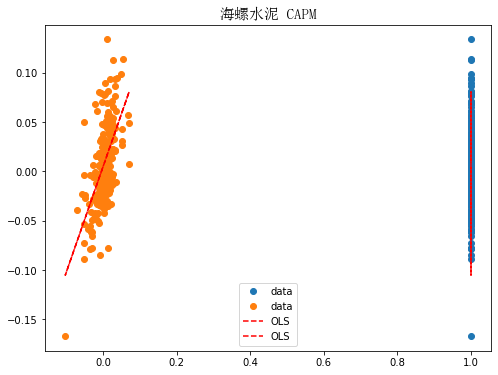

In [65]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_1,y_1, "o", label="data")
ax.plot(x_1,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("海螺水泥 CAPM",fontproperties=font)
plt.show()

In [66]:
from statsmodels.formula.api import ols

x_1 = sm.add_constant(wk.rm) #add a constant term
y_1 = wk.ri

model_1 = sm.OLS(y_1,x_1)

res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     121.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.90e-22
Time:                        01:06:33   Log-Likelihood:                 379.39
No. Observations:                 204   AIC:                            -754.8
Df Residuals:                     202   BIC:                            -748.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.003      0.374      0.709      -0.004       0.006
rm             1.1794      0.107     11.030      0.000       0.969       1.390
==============================================================================
Omnibus:                       33.339   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.534
Skew:                           0.872   Prob(JB):                     8.73e-13
Kurtosis:                       4.869   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

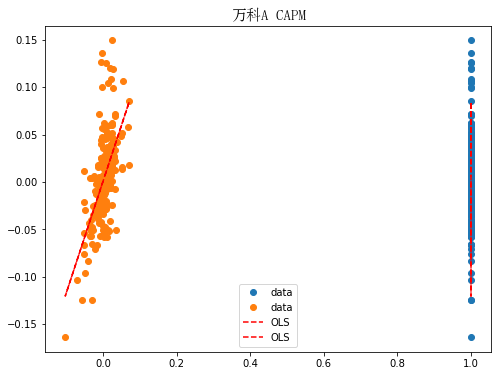

In [67]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_1,y_1, "o", label="data")
ax.plot(x_1,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("万科A CAPM",fontproperties=font)
plt.show()

In [68]:
from statsmodels.formula.api import ols

x_1 = sm.add_constant(pingan.rm) #add a constant term
y_1 = pingan.ri

model_1 = sm.OLS(y_1,x_1)

res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     224.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.20e-34
Time:                        01:06:34   Log-Likelihood:                 418.19
No. Observations:                 204   AIC:                            -832.4
Df Residuals:                     202   BIC:                            -825.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.002      0.902      0.368      -0.002       0.006
rm             1.3253      0.088     14.991      0.000       1.151       1.500
==============================================================================
Omnibus:                       30.484   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.859
Skew:                           0.748   Prob(JB):                     2.73e-13
Kurtosis:                       5.138   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

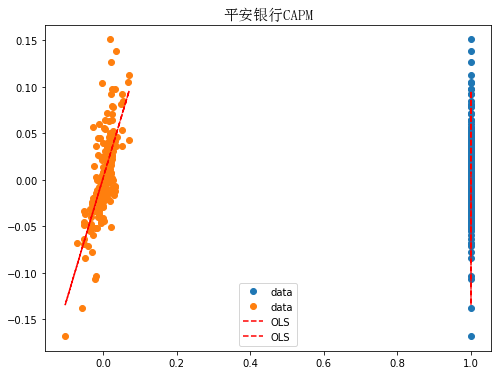

In [69]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_1,y_1, "o", label="data")
ax.plot(x_1,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("平安银行CAPM",fontproperties=font)
plt.show()

In [70]:
from statsmodels.formula.api import ols

x_1 = sm.add_constant(gy.rm) #add a constant term
y_1 = gy.ri

model_1 = sm.OLS(y_1,x_1)

res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           3.16e-07
Time:                        01:06:35   Log-Likelihood:                 377.41
No. Observations:                 204   AIC:                            -750.8
Df Residuals:                     202   BIC:                            -744.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.003     -0.741      0.459      -0.007       0.003
rm             0.5712      0.108      5.290      0.000       0.358       0.784
==============================================================================
Omnibus:                        2.232   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.113
Skew:                           0.047   Prob(JB):                        0.348
Kurtosis:                       3.490   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

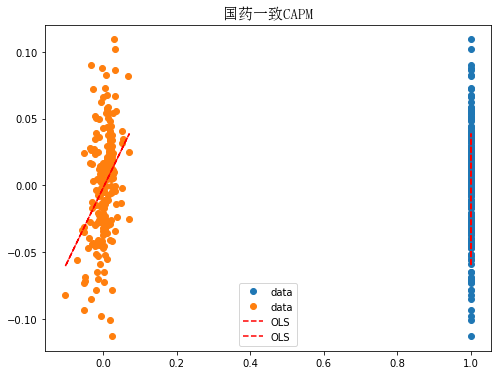

In [71]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_1,y_1, "o", label="data")
ax.plot(x_1,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("国药一致CAPM",fontproperties=font)
plt.show()

In [72]:
from statsmodels.formula.api import ols

x_1 = sm.add_constant(nfhk.rm) #add a constant term
y_1 = nfhk.ri

model_1 = sm.OLS(y_1,x_1)

res_1 = model_1.fit()
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ri   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.40e-28
Time:                        01:06:36   Log-Likelihood:                 392.97
No. Observations:                 204   AIC:                            -781.9
Df Residuals:                     202   BIC:                            -775.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.002     -0.913      0.363      -0.007       0.003
rm             1.2964      0.100     12.958      0.000       1.099       1.494
==============================================================================
Omnibus:                        4.150   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                4.905
Skew:                           0.112   Prob(JB):                       0.0861
Kurtosis:                       3.726   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

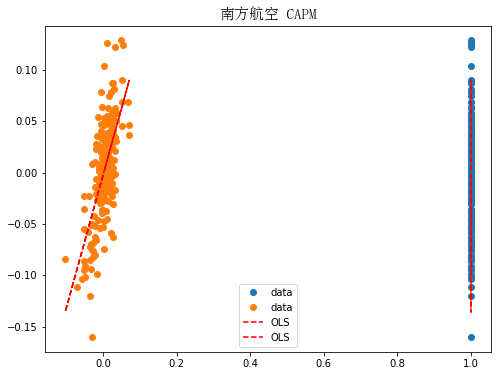

In [73]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_1,y_1, "o", label="data")
ax.plot(x_1,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("南方航空 CAPM",fontproperties=font)
plt.show()

In [233]:
#Make a portfolio with all stocks and use it to construct the CAPM

In [234]:
crsp_beta = total[["permno","date","ri"]]
crsp_beta

,permno,date,ri
0,000001.SZ,2017-01-06,0.000000
1,000002.SZ,2017-01-06,0.000000
2,000004.SZ,2017-01-06,0.000000
3,000005.SZ,2017-01-06,0.000000
4,000006.SZ,2017-01-06,0.000000
...,...,...,...
493675,603993.SH,2020-12-25,0.069173
493676,603996.SH,2020-12-25,-0.177477
493677,603997.SH,2020-12-25,-0.015929
493678,603998.SH,2020-12-25,-0.044094


In [ ]:
ret_mat = crsp_beta.set_index(["date","permno"]).unstack()
ret_mat.head()

In [ ]:
import scipy.optimize as sco

def port_ret(weights):  #the expected return based on the weights
    return np.sum(ret_mat.mean() *weights)

def port_vol(weights): #the risk based on the weights
    return np.sqrt(np.dot(weights.T, np.dot(ret_mat.cov(), weights)))

def min_func_sharpe(weights): #the function we want to minimize,就是sharpe ratio, 然后-min = max. 所以这里加了负号
    return port_ret(weights)/port_vol(weights)

cons = ({"type":"eq","fun":lambda x: np.sum(x)-1}) #constriant: the sum equals to 1
noa = len(ret_mat.columns) #number of stocks （一共有八支）
bnds = tuple((0,1) for x in range(noa)) #bound: the weight has to stay between 0 and 1
eweights = np.array(noa*[1./noa, ]) 
# the innitial equal weight, algorithm will start from here and find the wgt
#这个会output 一个列表，noa=8, 然后列表里1./noa = 1/8 会重复八次，就有八个innitial weight 对应八支stocks
opts = sco.minimize(port_vol,eweights,method = "SLSQP", bounds = bnds, constraints = cons, tol = 1e-12)


In [ ]:
#现在把搞好的wgt来匹配到每只stock上，所以先要获取stock的名字（permno）
#因为stock permno, 出现在ret_mat的columns 上，但由于我们先前unstack()了，导致有两个indexes，所以我们要把第一个index drop掉
#留下第二个，从而获取permno

#例子
ret_mat.columns.droplevel(0)

In [ ]:
#接上，开始实际操作
wgt = pd.DataFrame({"permno":ret_mat.columns.droplevel(0), "weight":(opts.x).round(6)}).set_index("permno")
wgt

In [ ]:
#Get the min variance portfolio monthly returns （前面找好了对应min var 的 wgt. 这里找对应的ret）

ret_pf = pd.DataFrame(data=np.dot(ret_mat,wgt),index = ret_mat.index,columns=["ret_pf"])
#这时候date还在index上，所以要先选他为index,然后之后再换成column
ret_pf = ret_pf.reset_index()
ret_pf.head()


In [ ]:
ret_pf= pd.merge(ret_pf,total,left_on = "date", right_on = "date", how ="inner")
ret_pf.head()

In [ ]:
ret_pf["portxrf"] = ret_pf.ret_pf - ret_pf.rf
ret_pf["rmxrf"] = ret_pf.rm - ret_pf.rf
ret_pf.head()

In [ ]:
#Step 6: Run regression on excess return of the portfolio on excess return of the market return

from statsmodels.formula.api import ols

x_2 = sm.add_constant(ret_pf.rmxrf) #add a constant term
y_2 = ret_pf.portxrf

model = sm.OLS(y_2,x_2)

res = model.fit()
res.summary()

In [ ]:
h1 = "const = 0"
res.t_test(h1)

In [ ]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_2,y_2, "o", label="data")
ax.plot(x_2,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("沪深主版组合 CAPM",fontproperties=font)
plt.show()

In [ ]:
#CAPM 的横截面回归

beta_p = res.params[1]

from statsmodels.formula.api import ols

 = ret_pf.rmxrf
x_3 = sm.add_constant(beta_p) #add a constant term
y_3 = ret_pf.portxrf

model = sm.OLS(y_3,x_3)

res = model.fit()
res.summary()

In [ ]:
h2 = "const = 0"
res.t_test(h1)

In [ ]:
Y= res_1.fittedvalues
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x_3,y_3, "o", label="data")
ax.plot(x_3,Y,"r--",label="OLS")
ax.legend(loc="best")
plt.title("沪深主版组合 CAPM",fontproperties=font)
plt.show()